In [16]:
import numpy as np
from pygsp import graphs, plotting
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
matplotlib.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

Create a Random Sensor Network

In [17]:
G = graphs.Sensor(N=10000,distribute=True, seed=42)
G.compute_fourier_basis()

2019-05-23 04:09:41,872:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (10000 x 10000) may take some time.


Created labeled signal

In [18]:
label_signal = np.copysign(np.ones(G.N), G.U[:, 5])

In [19]:
plt.figure(figsize=(20,7))
plt.plot(label_signal,'-ok',markersize=10,alpha=0.25)
plt.title('Graph Signal',size=30)
plt.xlabel('Vertex').set_size(20)
plt.ylabel('Amplitude').set_size(20)
plt.tick_params(size=20,labelsize=15)

The following network is what we will be working with. Here is the graph signal on the random network:

In [20]:
plt.rcParams['figure.figsize'] = (20, 7)
G.plot_signal(label_signal,plot_name='Sensor Network')
plt.title('Ground Truth Graph Signal',size=30)

Text(0.5,1,'Ground Truth Graph Signal')

Create a mask to simulate the noise on the graph signal:

In [21]:
rs = np.random.RandomState(42)
M = rs.rand(G.N)
M = (M > 0.6).astype(float)  # Probability of having no label on a vertex.

Let us apply the mask to the graph signal

In [22]:
sigma = 0.1
subsampled_noisy_label_signal = M * (label_signal + sigma * rs.standard_normal(G.N))

In [23]:
plt.figure(figsize=(20,7))
plt.plot(subsampled_noisy_label_signal,'-o',markersize=10,alpha=0.25)
plt.title('Noisy Graph Signal',size=30)
plt.xlabel('Vertex').set_size(20)
plt.ylabel('Amplitude').set_size(20)
plt.tick_params(size=20,labelsize=15)

Text(0.5,1,'Noisy Graph Signal')

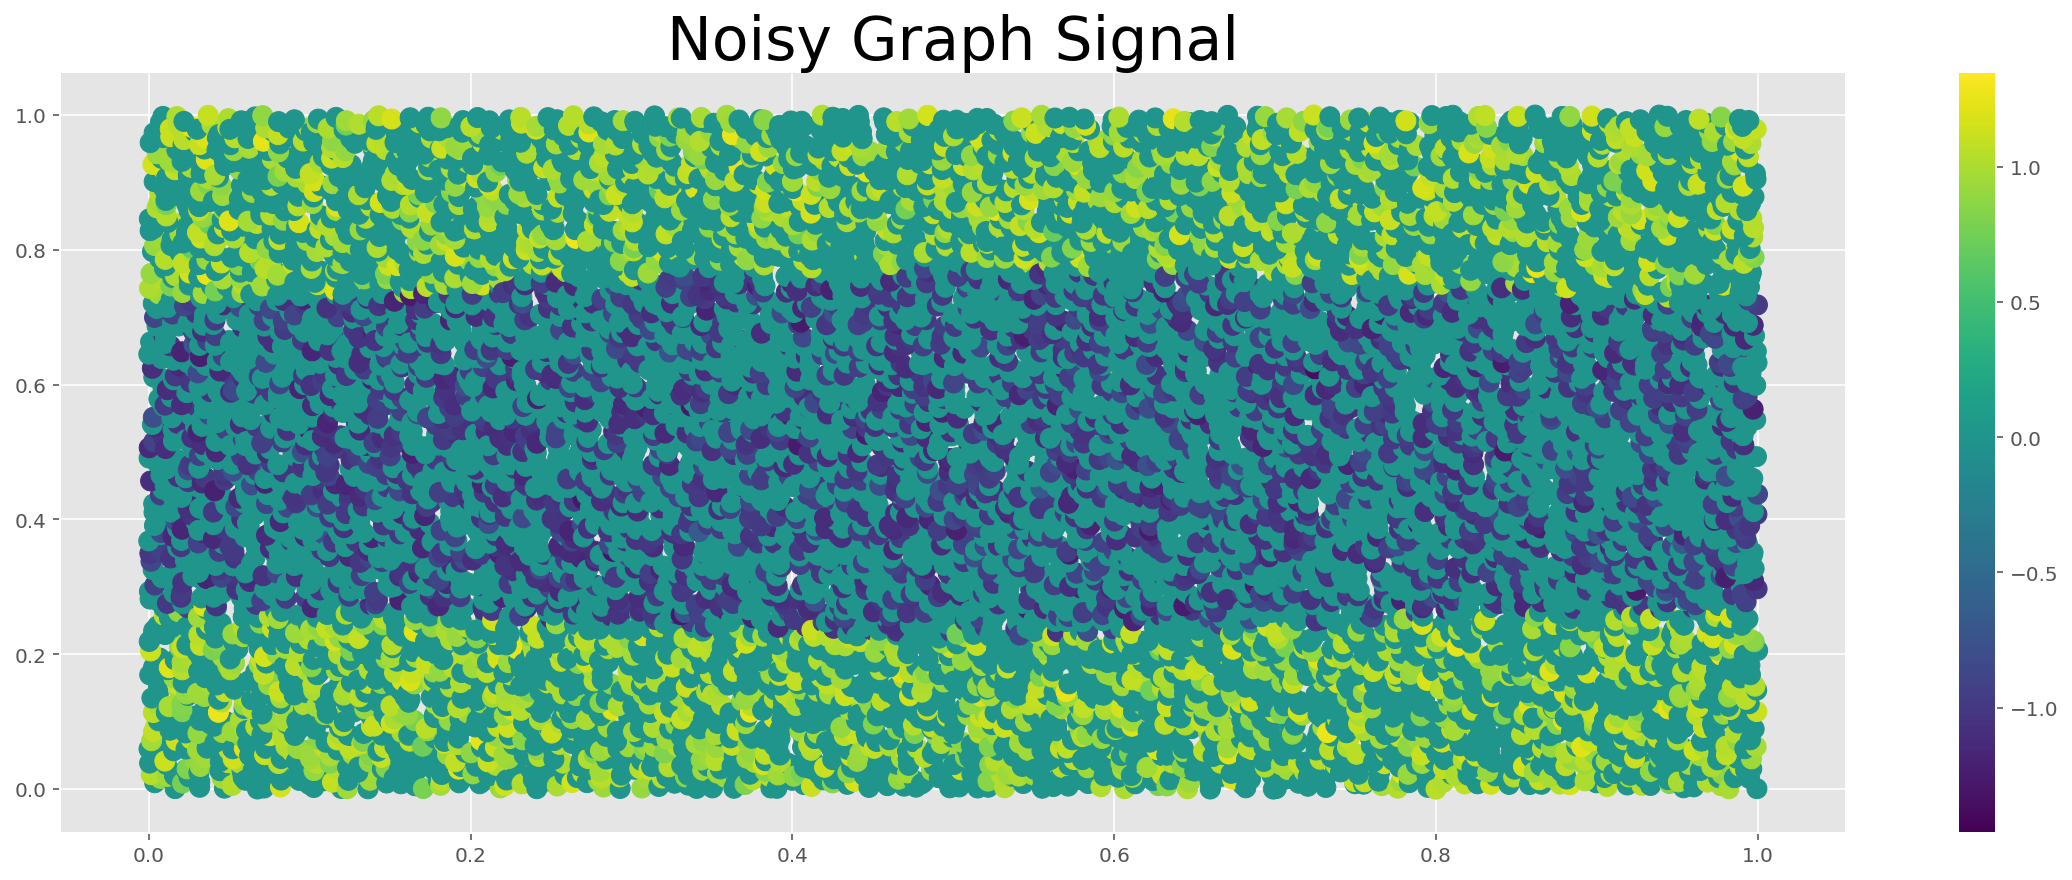

In [24]:
G.plot_signal(subsampled_noisy_label_signal,plot_name='Noisy Graph Signal')
plt.title('Noisy Graph Signal',size=30)

In [25]:
import pyunlocbox

In [26]:
gamma = 3.0
d = pyunlocbox.functions.dummy()
r = pyunlocbox.functions.norm_l1()
f = pyunlocbox.functions.norm_l2(w=M, y=subsampled_noisy_label_signal,lambda_=gamma)

In [27]:
G.compute_differential_operator()
L = G.D.toarray()
step = 0.999 / (1 + np.linalg.norm(L))
solver = pyunlocbox.solvers.mlfbf(L=L, step=step)

In [28]:
x0 = subsampled_noisy_label_signal.copy()
prob1 = pyunlocbox.solvers.solve([d, r, f], solver=solver,x0=x0, rtol=0, maxit=5000)

Solution found after 5000 iterations:
    objective function f(sol) = 9.562370e+03
    stopping criterion: MAXIT


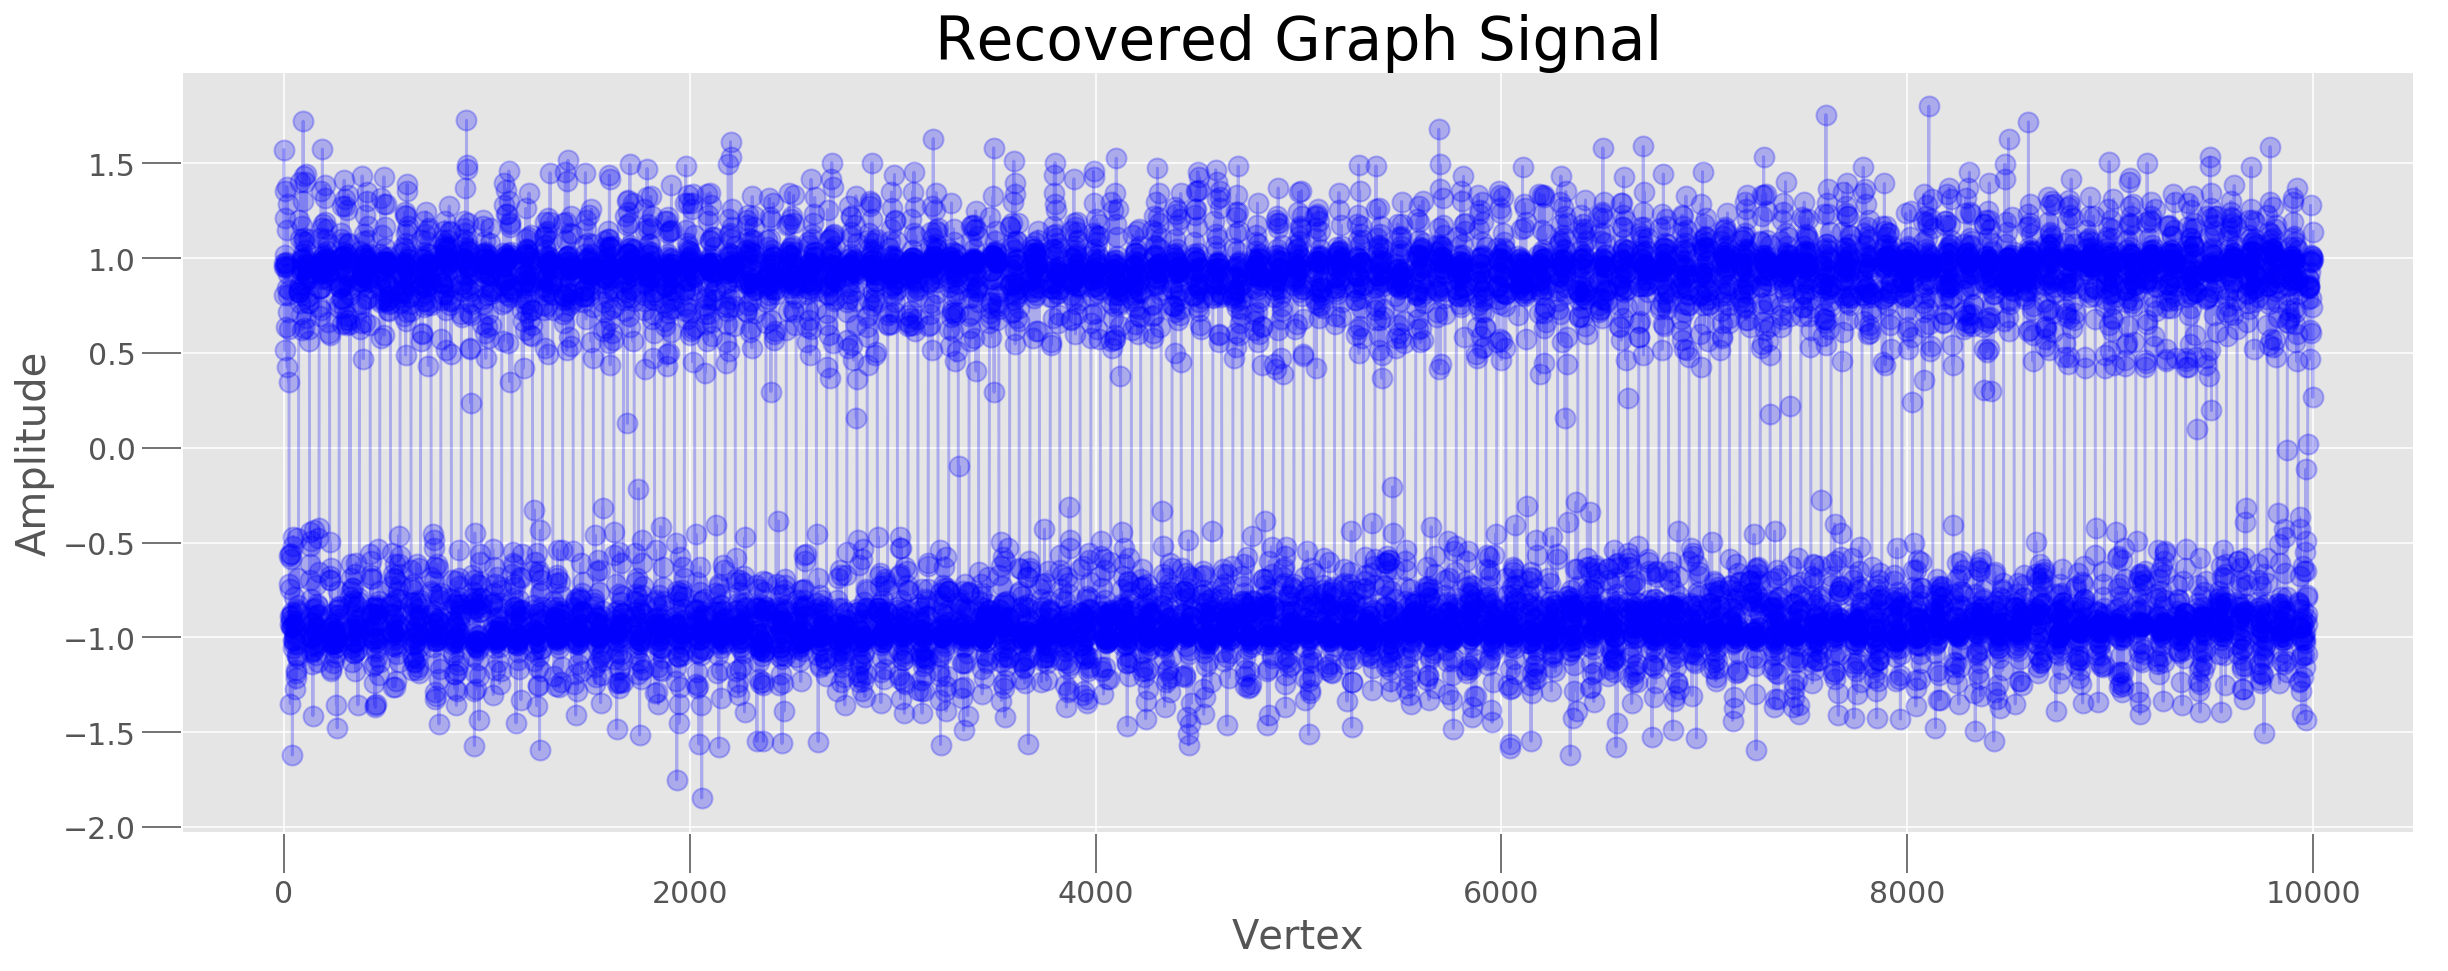

In [29]:
plt.figure(figsize=(20,7))
plt.plot(prob1['sol'],'-ob',markersize=10,alpha=0.25)
plt.title('Recovered Graph Signal',size=30)
plt.xlabel('Vertex').set_size(20)
plt.ylabel('Amplitude').set_size(20)
plt.tick_params(size=20,labelsize=15)

In [30]:
G.plot_signal(prob1['sol'],plot_name='Recovered Graph Signal')
plt.title('Recovered Graph Signal', size=30)

Text(0.5,1,'Recovered Graph Signal')

## MSE